In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

### Define a function to display evaluation metrics

In [2]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation metrics for " + regr_type + " Linear Regression")
    print("explained variance: ", round(ev, 4))
    print("mean absolute error: ", round(mae, 4))
    print("mean squared error: ", round(mse, 4))
    print("r square: ", round(r2, 4))
    print("rmse: ", round(np.sqrt(mse), 4))
    print()

### Generate a simple dataset with one feature

In [3]:
# Generate synthetic data
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal = 4 + 3 * X

# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

### Plot the data with outliers and the ideal fit line

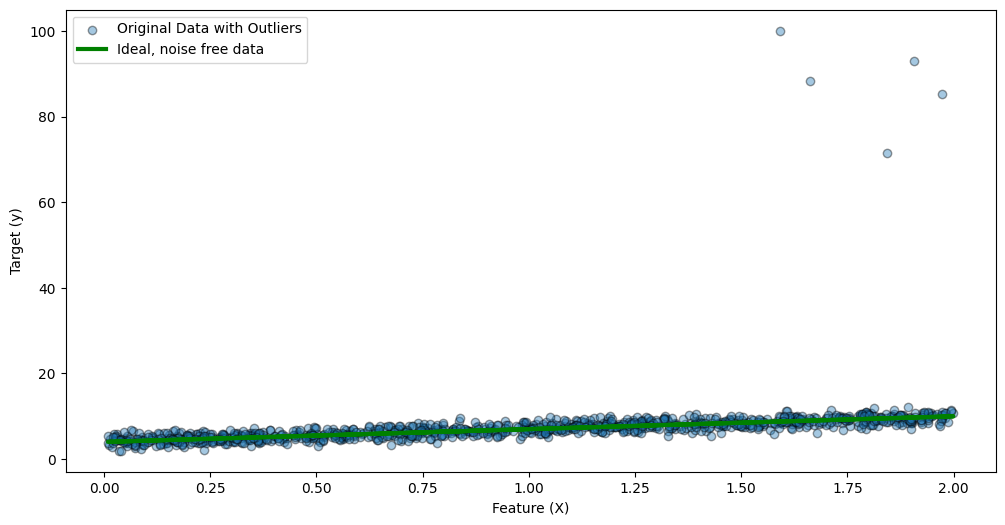

In [4]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4, ec="k", label="Original Data with Outliers")
plt.plot(X, y_ideal, lw=3, color="g", label="Ideal, noise free data")

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

### Exercise 1. Plot the data without the outliers

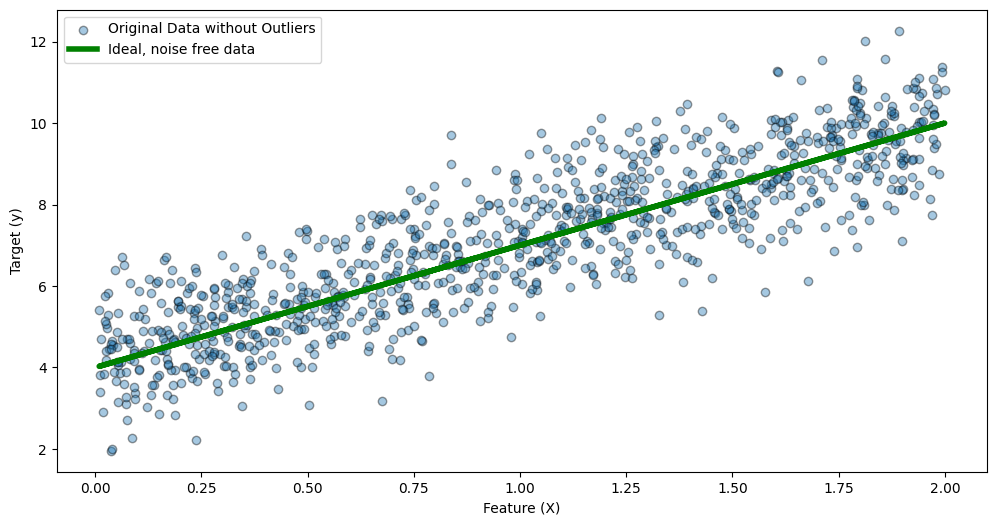

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data without Outliers")
plt.plot(X, y_ideal, lw="4", color="g", label="Ideal, noise free data")

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

### Fit Ordinary, Ridge, and Lasso regression models and use them to make predicitions on the original, outlier-free data

In [6]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

### Print the regression results

In [7]:
regression_results(y, y_outlier_pred_lin, "Oridinary")
regression_results(y, y_outlier_pred_ridge, "Ridge")
regression_results(y, y_outlier_pred_lasso, "Lasso")

Evaluation metrics for Oridinary Linear Regression
explained variance:  0.6748
mean absolute error:  0.9468
mean squared error:  1.4164
r square:  0.6357
rmse:  1.1901

Evaluation metrics for Ridge Linear Regression
explained variance:  0.6766
mean absolute error:  0.9443
mean squared error:  1.4094
r square:  0.6375
rmse:  1.1872

Evaluation metrics for Lasso Linear Regression
explained variance:  0.7394
mean absolute error:  0.8597
mean squared error:  1.1651
r square:  0.7003
rmse:  1.0794



### Plot the data and the predictions for comparison

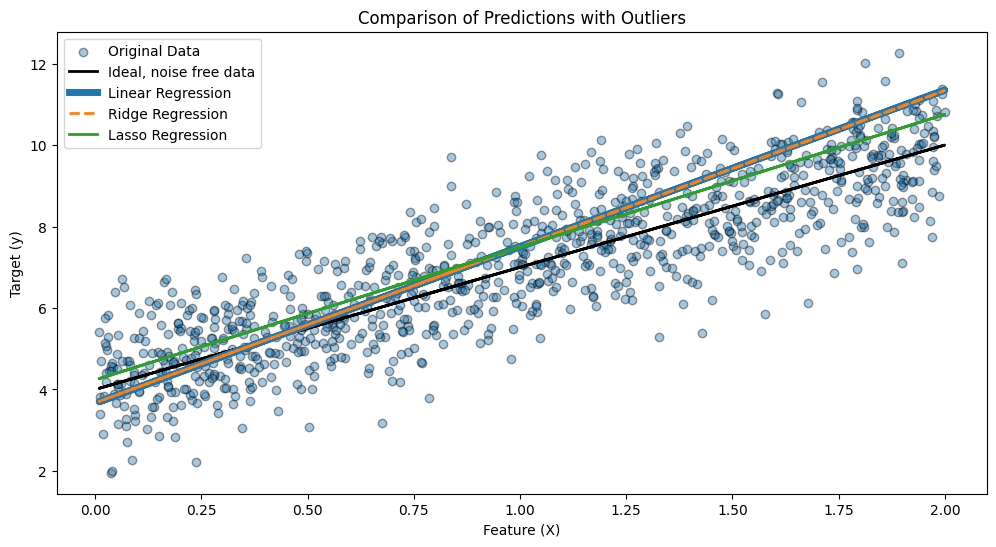

In [8]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data")

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal, lw=2, color="k", label="Ideal, noise free data")

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin, linewidth=5, label="Linear Regression")

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle="--", lw=2, label="Ridge Regression")

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso, lw=2, label="Lasso Regression")

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

### Exercise 2. Build the models and the prediction plots from the same data, excluding the outliers

Evaluation metrics for Oridinary Linear Regression
explained variance:  0.7492
mean absolute error:  0.7873
mean squared error:  0.975
r square:  0.7492
rmse:  0.9874

Evaluation metrics for Ridge Linear Regression
explained variance:  0.7492
mean absolute error:  0.7874
mean squared error:  0.975
r square:  0.7492
rmse:  0.9874

Evaluation metrics for Lasso Linear Regression
explained variance:  0.7191
mean absolute error:  0.8408
mean squared error:  1.0923
r square:  0.7191
rmse:  1.0451



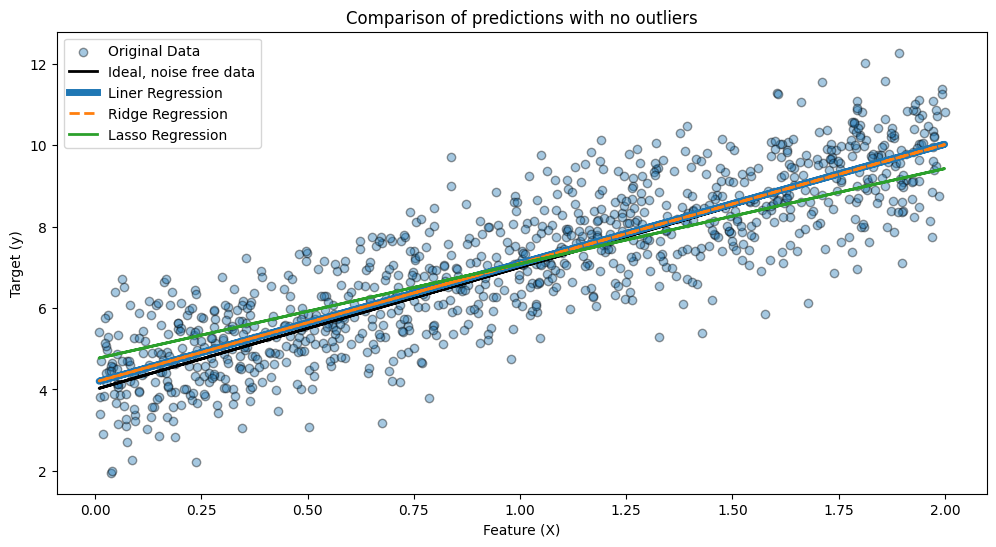

In [9]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_results(y, y_pred_lin, "Oridinary")
regression_results(y, y_pred_ridge, "Ridge")
regression_results(y, y_pred_lasso, "Lasso")

# Plot the data and the predictions
plt.figure(figsize=(12, 6))

# Scatter plot of the original data
plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data")

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal, lw=2, color="k", label="Ideal, noise free data")

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin, lw=5, label="Liner Regression")

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle="--", lw=2, label="Ridge Regression")

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso, lw=2, label="Lasso Regression")

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

### Multiple regression regularization and Lasso feature selction

#### Create a high dimensional synthetic dataset with a small number of informative features using make_regression

In [10]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_predictions, test_size=0.3, random_state=42)

### Initialize and fit the linear regression models and use them to predict the target.

In [11]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_linear = linear.predict(X_test)

#### Print the regression results

In [12]:
regression_results(y_test, y_pred_lasso, "Lasso")
regression_results(y_test, y_pred_ridge, "Ridge")
regression_results(y_test, y_pred_linear, "Linear")

Evaluation metrics for Lasso Linear Regression
explained variance:  0.9815
mean absolute error:  13.8855
mean squared error:  304.644
r square:  0.9815
rmse:  17.4541

Evaluation metrics for Ridge Linear Regression
explained variance:  0.4446
mean absolute error:  76.9622
mean squared error:  9744.4693
r square:  0.4079
rmse:  98.7141

Evaluation metrics for Linear Linear Regression
explained variance:  0.4354
mean absolute error:  77.7353
mean squared error:  9844.2714
r square:  0.4018
rmse:  99.2183



### Plot the predictions vs actuals

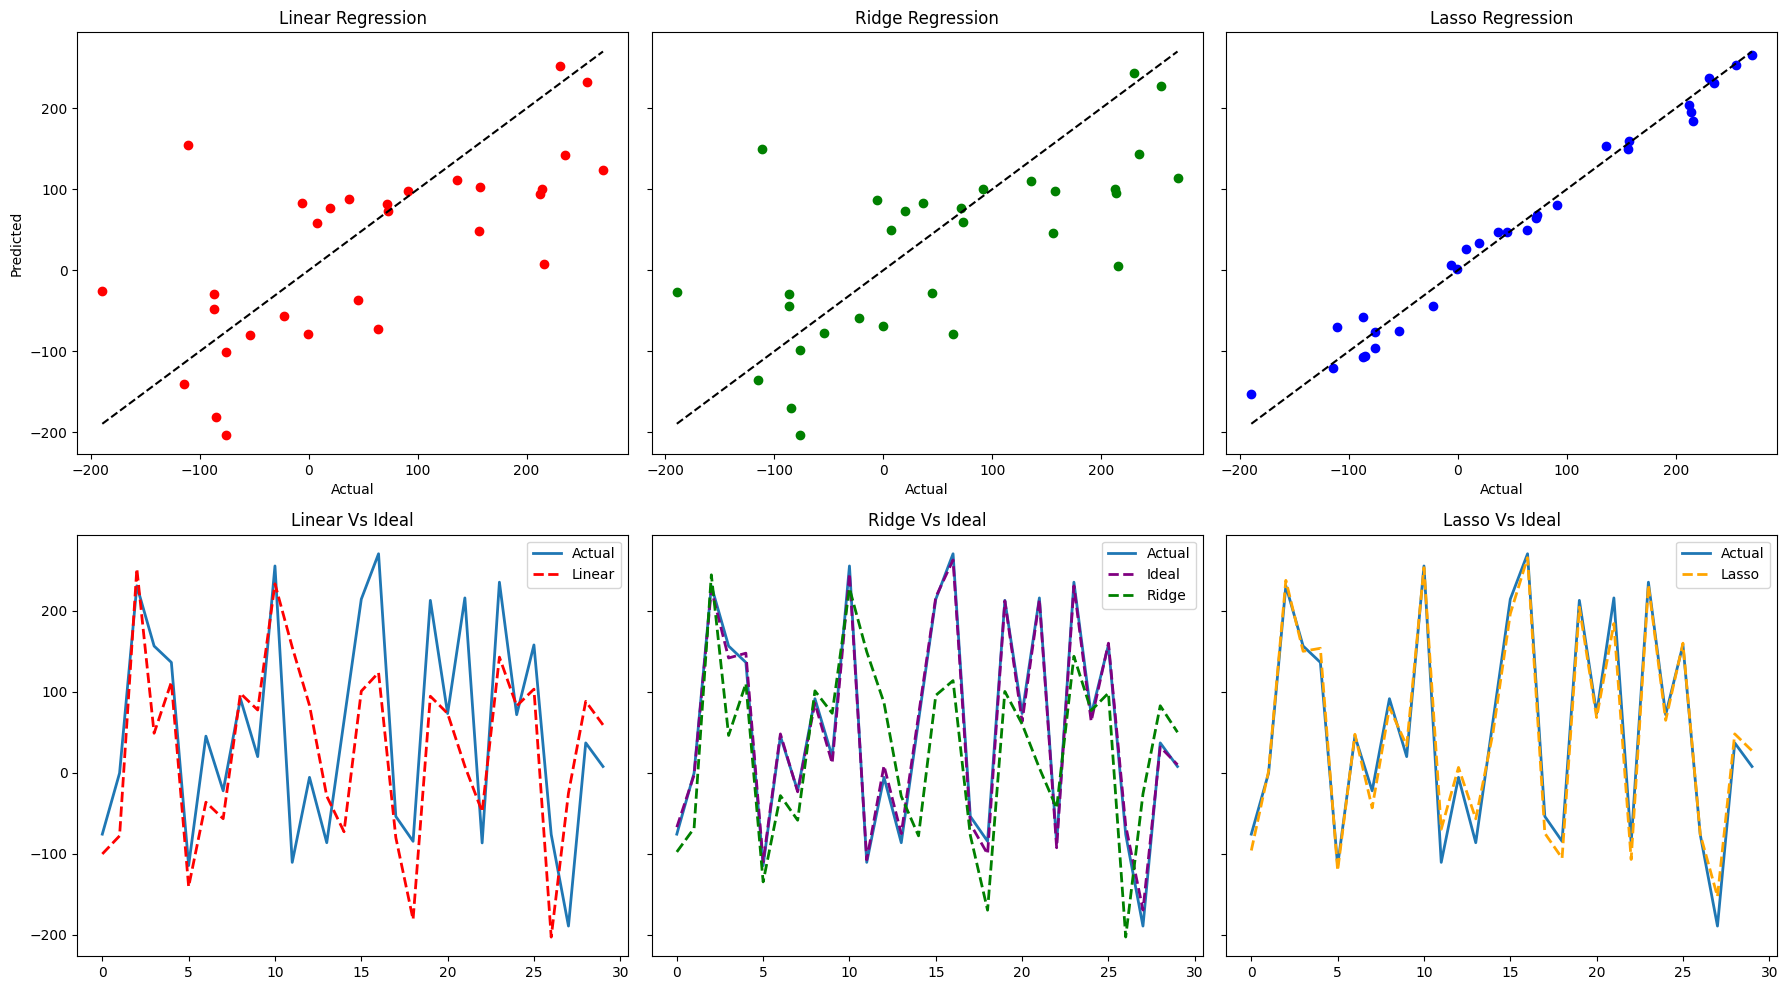

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

ax[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
ax[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
ax[0,0].set_title("Linear Regression")
ax[0,0].set_xlabel("Actual")
ax[0,0].set_ylabel("Predicted")

ax[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
ax[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
ax[0,1].set_title("Ridge Regression")
ax[0,1].set_xlabel("Actual")

ax[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
ax[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
ax[0,2].set_title("Lasso Regression")
ax[0,2].set_xlabel("Actual")

# Line plots for predictions compared to actual and ideal predictions
ax[1,0].plot(y_test, label="Actual", lw=2)
ax[1,0].plot(y_pred_linear, "--", lw=2, color="red", label="Linear")
ax[1,0].set_title("Linear Vs Ideal")
ax[1,0].legend()

ax[1,1].plot(y_test, label="Actual", lw=2)
ax[1,1].plot(ideal_test, "--", label="Ideal", lw=2, color="purple")
ax[1,1].plot(y_pred_ridge, "--", label="Ridge", lw=2, color="green")
ax[1,1].set_title("Ridge Vs Ideal")
ax[1,1].legend()

ax[1,2].plot(y_test, label="Actual", lw=2)
ax[1,2].plot(y_pred_lasso, "--", color="orange", lw=2, label="Lasso")
ax[1,2].set_title("Lasso Vs Ideal")
ax[1,2].legend()

plt.tight_layout()
plt.show()

### Model coefficients

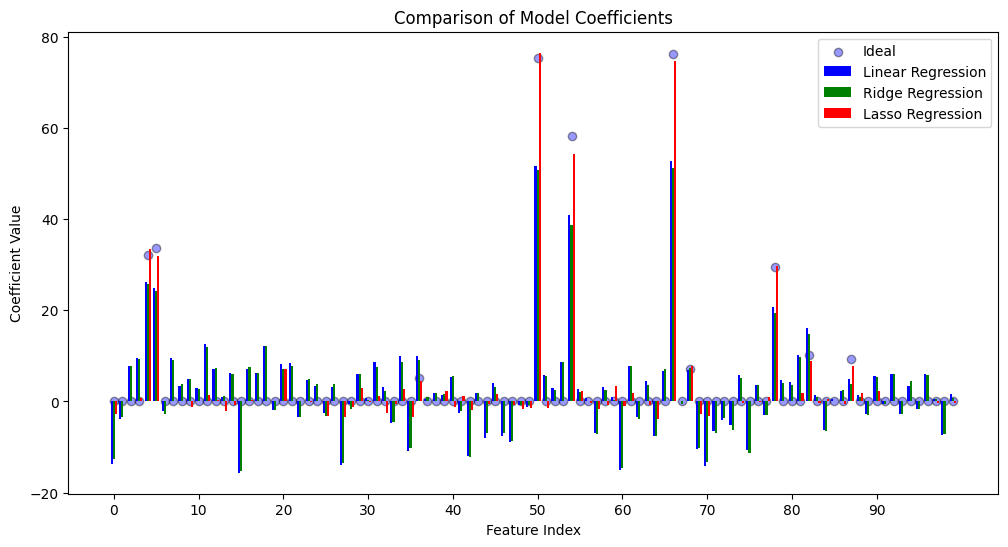

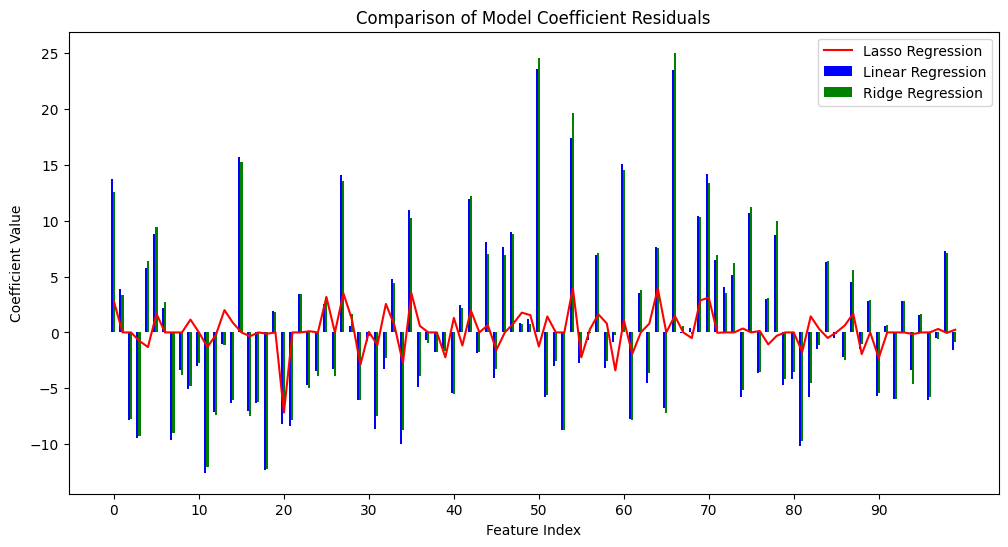

In [14]:
# Model coefficients
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_

# Plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis), max(x_axis), 10)
plt.figure(figsize=(12, 6))

plt.scatter(x_axis, ideal_coef, label="Ideal", color="blue", ec="k", alpha=0.4)
plt.bar(x_axis - 0.25, linear_coeff, width=0.25, label="Linear Regression", color="blue")
plt.bar(x_axis, ridge_coeff, width=0.25, label="Ridge Regression", color="green")
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label="Lasso Regression", color="red")

plt.title("Comparison of Model Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.xticks(x_labels)
plt.legend()
plt.show()

# Plot the coefficient residuals
x_axis = np.arange(len(linear_coeff))
plt.figure(figsize=(12, 6))

plt.bar(x_axis - 0.25, ideal_coef - linear_coeff, width=0.25, label="Linear Regression", color="blue")
plt.bar(x_axis, ideal_coef - ridge_coeff, width=0.25, label="Ridge Regression", color="green")
#plt.bar(x_axis + 0.25, ideal_coef - lasso_coeff, width=0.25, label="Lasso Regression", color="red")
plt.plot(x_axis, ideal_coef - lasso_coeff, label='Lasso Regression', color='red')

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Model Coefficient Residuals")
plt.xticks(x_labels)
plt.legend()
plt.show()

#### Use Lasso to select the most important features and compare the three different linear regression models again on the resulting data.

Part 1. Choose a threshold value to select features based on the Lasso model coefficients

In [17]:
threshold = 5

# Create a dataframe containing the Lasso model and ideal coefficients
feature_importance_df = pd.DataFrame({"Lasso Coefficient" : lasso_coeff, "Ideal Coefficient" : ideal_coef})

# Mark the selected features
feature_importance_df["Feature Selected"] = feature_importance_df["Lasso Coefficient"].abs() > threshold

print("\nFeatures identified as Important by Lasso:")
display(feature_importance_df[feature_importance_df["Feature Selected"]])

print("\nNonzero Ideal Coefficient Indices")
display(feature_importance_df[feature_importance_df["Ideal Coefficient"]>0])


Features identified as Important by Lasso:


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
20,7.163636,0.000000,True
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True



Nonzero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


Part 2. Use the threshold to select the most important features for use in modelling.

In [18]:
important_features = feature_importance_df[feature_importance_df["Feature Selected"]].index

In [19]:
# Filter features
X_filtered = X[:, important_features]
print("Shape of the filtered feature set:", X_filtered.shape)

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X_filtered, y, ideal_predictions, test_size=0.3, random_state=42)

Shape of the filtered feature set: (100, 10)


Part 3. Fit and apply the three models to the selected features

In [20]:
# Initialize the models
linear = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit the models
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

Exercise 4. Print the regression performance results

In [21]:
regression_results(y_test, y_pred_linear, "Ordinary")
regression_results(y_test, y_pred_ridge, "Ridge")
regression_results(y_test, y_pred_lasso, "Lasso")

Evaluation metrics for Ordinary Linear Regression
explained variance:  0.9917
mean absolute error:  9.653
mean squared error:  139.4874
r square:  0.9915
rmse:  11.8105

Evaluation metrics for Ridge Linear Regression
explained variance:  0.9909
mean absolute error:  10.1418
mean squared error:  156.9035
r square:  0.9905
rmse:  12.5261

Evaluation metrics for Lasso Linear Regression
explained variance:  0.9917
mean absolute error:  9.6928
mean squared error:  140.803
r square:  0.9914
rmse:  11.866



### Exercise 5. Regenerate the same plots as before and compare the results

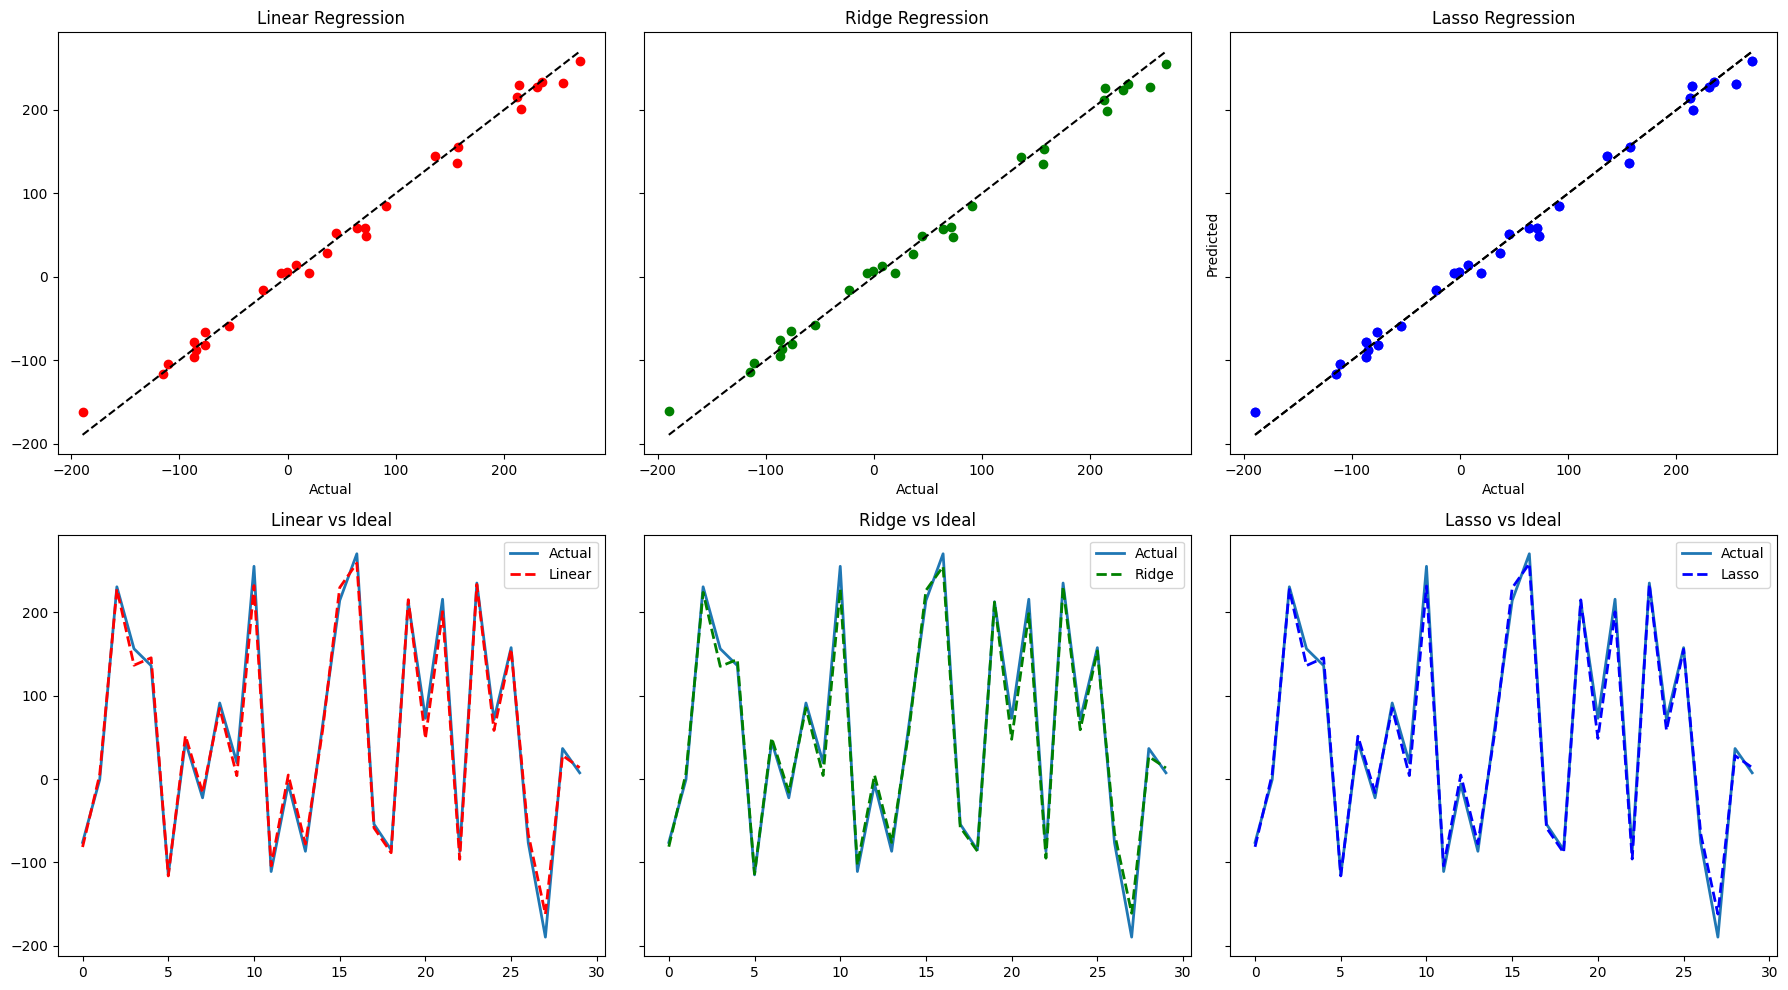

In [22]:
# Plot the predictions vs actuals
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression",)
axes[0,0].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()